<a href="https://colab.research.google.com/github/pavani-chenna/Car-Evaluation-Classification-using-Random-Forest/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns       #statistical data visualization


In [2]:
df=pd.read_csv("/content/car_evaluation.csv")

In [3]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


#EDA

In [4]:
df.shape

(1727, 7)

rename the columns

In [5]:
col=['buying','maint','door','persons','lug_boot','safety','class']
df.columns=col

In [6]:
#check the first 5 rows
df.head()

,buying,maint,door,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [7]:
#get the overall information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   door      1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [8]:
col=['buying','maint','door','persons','lug_boot','safety','class']
for i in col:
  print(df[i].value_counts())

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
door
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety
med     576
high    576
low     575
Name: count, dtype: int64
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


There are 7 variables in the data set All the variables are of categorical data type

Explore the class variables

In [9]:
df['class'].value_counts()

,count
class,
unacc,1209
acc,384
good,69
vgood,65


The class is a ordinal in nature

**Missing values in he variables**

In [10]:
df.isnull().sum()

,0
buying,0
maint,0
door,0
persons,0
lug_boot,0
safety,0
class,0


we can see there is no missing values in the dataset . I have to check the frequency distribution of values. it is also confirm there is no missing values

**Declare the feature and target variables**

In [11]:
X=df.drop(['class'],axis=1)
y=df['class']

**Split the data into training and test set**

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [13]:
#check shape of x train, xtest
X_train.shape,X_test.shape

((1157, 6), (570, 6))

**Feature Engineering**--->is the process of transforming raw data into useful features that helps us to understand our model better and increaseits predictive power.

first i will check the data types of variables

In [14]:
X_train.dtypes

,0
buying,object
maint,object
door,object
persons,object
lug_boot,object
safety,object


**encode the categorical variables**

In [15]:
X_train.head()

,buying,maint,door,persons,lug_boot,safety
83,vhigh,vhigh,5more,2,med,low
48,vhigh,vhigh,3,more,med,med
468,high,vhigh,3,4,small,med
155,vhigh,high,3,more,med,low
1043,med,high,4,more,small,low


we can see that all variba;les are ordinal categorical datatypes

In [16]:
#import category encoders
! pip install category_encoders
import category_encoders as ce

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 4.2 MB/s eta 0:00:00


In [17]:
import category_encoders as ce

In [18]:
#encode the categorical variables with ordinal encoders
encoder = ce.OrdinalEncoder(cols=['buying','maint','door','persons','lug_boot','safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [19]:
#encoder=ce.OrdinalEncoder(cols=['buying','maint','door','persons','lug_boot','safety'])
#X_train=encoder.fit_transform(X_train)
#X_test=encoder.transform(X_test)

In [20]:
X_train.head()

,buying,maint,door,persons,lug_boot,safety
83,1,1,1,1,1,1
48,1,1,2,2,1,2
468,2,1,2,3,2,2
155,1,2,2,2,1,1
1043,3,2,3,2,2,1


**We have training and test read for modelling**

**RandomForest classifier model with default parameter**

In [21]:
from sklearn.ensemble import RandomForestClassifier
#instantiate the classsifier
rfc=RandomForestClassifier(random_state=0)
#fit the model
rfc.fit(X_train,y_train)
#predict the test results
y_pred=rfc.predict(X_test)

In [22]:
#check the accuracy scores
from sklearn.metrics import accuracy_score
print("model accuracy score with 10 decision trees : {0:4f}".format(accuracy_score(y_test,y_pred)))


model accuracy score with 10 decision trees : 0.964912


Random forest with 100 estimators

In [23]:
from sklearn.ensemble import RandomForestClassifier
#instantiate the classsifier
rfc_100=RandomForestClassifier(n_estimators=100,random_state=0)
#fit the model
rfc_100.fit(X_train,y_train)
#predict the test results
y_pred_100=rfc_100.predict(X_test)

#check the accuracy scores
from sklearn.metrics import accuracy_score
print("model accuracy score with 100 decision trees : {0:4f}".format(accuracy_score(y_test,y_pred_100)))

model accuracy score with 100 decision trees : 0.964912


**find the important features with random forest model**

untill now i have used all the features given in he model.now  i will select only the important builds the model using these and use its efffects and accuracy

In [24]:
from sklearn.ensemble import RandomForestClassifier
#instantiate the classsifier
rfc=RandomForestClassifier(n_estimators=100,random_state=0)
#fit the model
rfc.fit(X_train,y_train)


RandomForestClassifier(random_state=0)

now i will use the feature imporatance variable to see feature importance scores

In [25]:
feature_scores = pd.Series(rfc.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_scores

,0
safety,0.291657
persons,0.235380
buying,0.160692
maint,0.134143
lug_boot,0.111595
door,0.066533


i can see the most important feature is the safety and least important id door

**visualize the feature scores**

now i will visualize the feature scores with matplotlb and seaborn

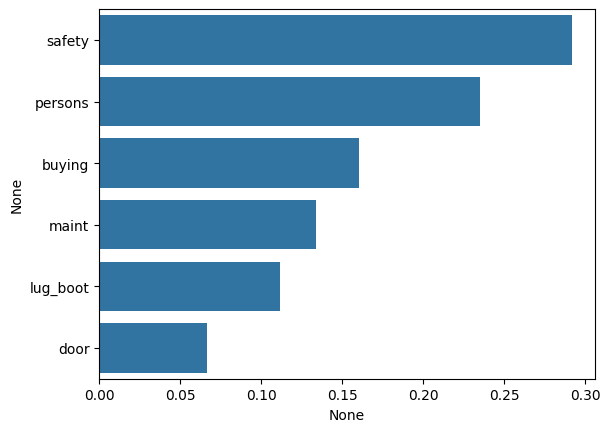

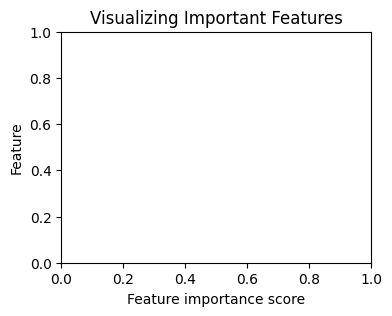

In [26]:
sns.barplot(x=feature_scores,y=feature_scores.index)
plt.figure(figsize=(4,3))
#add the labels
plt.xlabel("Feature importance score")
plt.ylabel("Feature")
#add the title
plt.title("Visualizing Important Features")
plt.show()

**Build the Random forest model on selected features**

In [27]:
X=df.drop(['class','door'],axis=1)
y=df['class']

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [29]:
encoders = ce.OrdinalEncoder(cols=['buying','maint','persons','lug_boot','safety'])
X_train = encoders.fit_transform(X_train)
X_test = encoders.transform(X_test)

In [30]:
from sklearn.ensemble import RandomForestClassifier
#instantiate the classsifier
rfc_100=RandomForestClassifier(n_estimators=100,random_state=0)
#fit the model
rfc_100.fit(X_train,y_train)
#predict the test results
y_pred_100=rfc_100.predict(X_test)

#check the accuracy scores
from sklearn.metrics import accuracy_score
print("model accuracy score with 10 decision trees : {0:4f}".format(accuracy_score(y_test,y_pred_100)))

model accuracy score with 10 decision trees : 0.926316


**Confusion Matrix**

In [31]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_100)
print("confusion matrix\n\n",cm)

confusion matrix

 [[108   5  12   2]
 [  1  10   2   5]
 [ 10   0 389   0]
 [  4   1   0  21]]


**Classifiction report**

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_100))

              precision    recall  f1-score   support

         acc       0.88      0.85      0.86       127
        good       0.62      0.56      0.59        18
       unacc       0.97      0.97      0.97       399
       vgood       0.75      0.81      0.78        26

    accuracy                           0.93       570
   macro avg       0.80      0.80      0.80       570
weighted avg       0.93      0.93      0.93       570

